# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

1) <br>
Обозначим итоговый алгоритм a(x)
Заметим, что в данном случае весов для того, что выбрать j-ый класс нужно, чтобы хотя бы 2 из 3ех базовых алгоритмов проголосовали за него. 
$$P(a(x) \neq y) = P(хотя \; бы \;2\; из \;3ех\; базовых\; алгоритмов\; проголосовали\; за \;1-y \;на\; входе \;x) = P(хотя \; бы \;2\; из \;3ех\; базовых\; алгоритмов\; ошиблись \;на\; x) = C_3^2 p^2 = 3p^2$$ <br>
2) <br>
Заметим, что в данном случае весов для того, что выбрать j-ый класс нужно, чтобы алгоритм $b_2$ проголосовал за него, ответ остальных неважен. Поэтому:
$$P(a(x) \neq y) = P(b_2(x) \neq y) = p$$

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

Пусть мы уже построили $a_{N-1}(x) = \sum_{i=0}^{N-1} b_i(x)$. <br>
Тогда наша задача $$\sum_{i=1}^l = L(y_i, a_{N-1}(x_i) + b(x_i)) \rightarrow min_{b}$$
$b$ можно представить вектором сдвигов: $ s = (s_1, ..., s_l) = (b(x_1), ...., b(x_l))$ 
То есть: $$F(s) = \sum_{i=1}^l = L(y_i, a_{N-1}(x_i) + s_i) \rightarrow min_{s_1, ..., s_l}$$<br>
Нужно найти вектор s, который больше всего уменьшает функцию L - это антиградиент: <br>
$s = -grad\; F(s) = (-L'_z(y_1, a_{N-1}(x_1)), ..., -L'_z(y_l, a_{N-1}(x_l)))$ <br>
В нашем случае: $L'_z(y, z) = -\frac{y}{z} + \frac{1-y}{1-z} \; \Rightarrow \; s = (-\frac{y_1}{a_{N-1}(x_1)} + \frac{1-y_1}{1-a_{N-1}(x_1)}, ..., -\frac{y_l}{a_{N-1}(x_l)} + \frac{1-y_l}{1-a_{N-1}(x_l)})$ <br>
То есть возьмем 
$$b_N = (b_N(x_1), ...., b_N(x_l)) = (-\frac{y_1}{a_{N-1}(x_1)} + \frac{1-y_1}{1-a_{N-1}(x_1)}, ..., -\frac{y_l}{a_{N-1}(x_l)} + \frac{1-y_l}{1-a_{N-1}(x_l)})$$
где $a_{N-1}(x) = \sum_{i=0}^{N-1} b_i(x)$

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

Пусть всего объектов N. Для простоты обозначим $w_j^n = w_j$. Тогда $err_n = \frac{w_j}{\sum_{i=0}^N w_i}$ <br>
Тогда 
$$\alpha_n = log(\frac{1 - err_n}{err_n}) = log(1 - err_n) - log(err_n) = log(\sum_{i=0}^N w_i - w_j) - log(\sum_{i=0}^N w_i) - log(w_j) + log(\sum_{i=0}^N w_i) = log(\sum_{i=0}^N w_i - w_j) - log(w_j)$$ <br>
Тогда получим: 
$$w_j^{n+1} = w_j e^{\alpha_n * 1} =  w_j e^{log(\sum_{i=0}^N w_i - w_j) - log(w_j)} = w_j \frac{\sum_{i=0}^N w_i - w_j}{w_j} = \sum_{i=0}^N w_i - w_j = \sum_{i=0, i \neq j}^N w_i$$

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
def bagging(X, y, size):
    #Implement random sampling here
    indeces = np.random.choice(np.arange(y.shape[0]), size=size)
    sample_X, sample_y = X[indeces], y[indeces]
    return sample_X, sample_y

In [67]:
class RandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth, max_features, criterion):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        for num in range(self.num_trees):
            sample_X, sample_y = bagging(X_train, y_train, len(X_train))
            tree = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, criterion=self.criterion)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        all_predictions = []
        y_pred = np.zeros(len(X_test))
        for tree in self.trees:
            all_predictions.append(tree.predict(X_test))
        all_predictions = np.array(all_predictions)
        
        for i, y in enumerate(all_predictions.T):
            unique, counts = np.unique(y, return_counts=True)
            y_pred[i] = unique[np.argmax(counts)]
        
        return y_pred

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [47]:
names = ['label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
         'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline'] 
data = pd.read_csv('wine.data', names=names)
data.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
from sklearn.cross_validation import train_test_split
X = np.array(data.iloc[:,1:])
y = np.array(data.label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForest(num_trees = 10, max_depth=10000, max_features='sqrt', criterion='gini')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [49]:
accuracy_score(predictions, y_test)

0.9814814814814815

Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

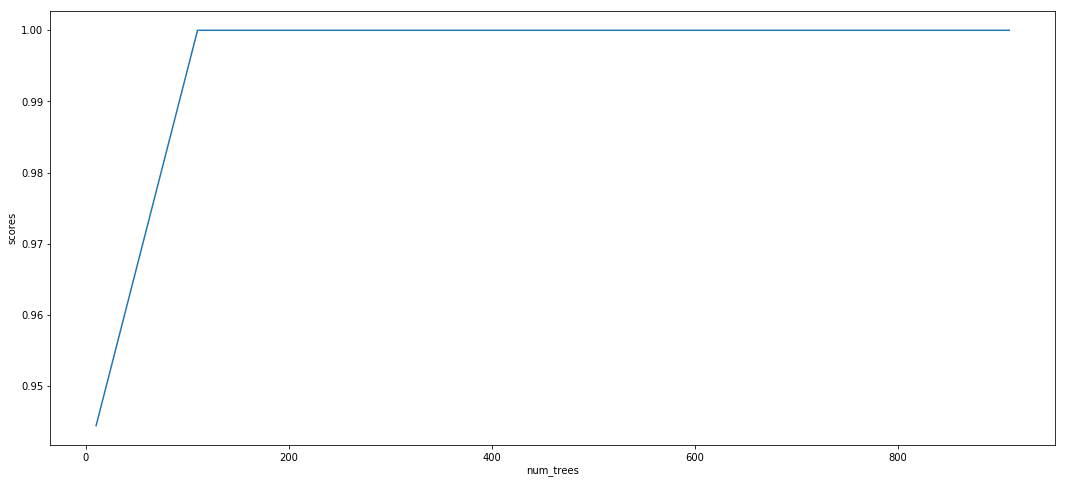

In [52]:
scores = []
nums = np.arange(10, 1000, 100)
for num in nums:
    clf = RandomForest(num_trees = num, max_depth=10000, max_features='sqrt', criterion='gini')
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    scores.append(accuracy_score(predictions, y_test))
    
plt.figure(figsize=(18, 8))
plt.plot(nums, scores)
plt.xlabel('num_trees')
plt.ylabel('scores')
plt.show()

Как видно из графика, никакого переобучения нет. Также можно заметить, что уже при около 150 деревьев алгоритм дает 100% результат на наших данных.

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

Проведем 3 попытки

In [72]:
from sklearn.ensemble import RandomForestClassifier
for i in range(3):
    clf1 = RandomForestClassifier(n_estimators= 10, max_depth=10000, max_features='sqrt', criterion='gini')
    clf1.fit(X_train, y_train)
    pred = clf1.predict(X_test)

    clf2 = RandomForest(num_trees = 10, max_depth=10000, max_features='sqrt', criterion='gini')
    clf2.fit(X_train, y_train)
    pred2 = clf2.predict(X_test)

    print('RandomForest из sklearn :', accuracy_score(pred, y_test))
    print('Мой RandomForest', accuracy_score(pred2, y_test))
    print()

RandomForest из sklearn : 0.9259259259259259
Мой RandomForest 0.9629629629629629

RandomForest из sklearn : 0.9814814814814815
Мой RandomForest 0.9814814814814815

RandomForest из sklearn : 1.0
Мой RandomForest 0.9814814814814815



Как видим, наш RandomForest работает в среднем ничуть не хуже стандартного.

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [90]:
class RandomForestNew(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth, max_features, criterion):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        if (self.max_features == 'sqrt'):
            size = int(np.sqrt(len(X_train)))
        elif (self.max_features == 'log2'):
            size = int(np.log2(len(X_train)))
        elif (type(self.max_features) == float):
            size = int(self.max_features * len(X_train))
        elif (type(self.max_features) == int):
            size = self.max_features
        self.ind_features = np.random.choice(np.arange(X_train.shape[1]), size=size)
        X_train_new = X_train[:,self.ind_features]
        for num in range(self.num_trees):
            sample_X, sample_y = bagging(X_train_new, y_train, len(X_train))
            tree = DecisionTreeClassifier(max_depth=self.max_depth, max_features=X_train_new.shape[1], 
                                          criterion=self.criterion)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        all_predictions = []
        y_pred = np.zeros(len(X_test))
        for tree in self.trees:
            all_predictions.append(tree.predict(X_test[:,self.ind_features]))
        all_predictions = np.array(all_predictions)
        
        for i, y in enumerate(all_predictions.T):
            unique, counts = np.unique(y, return_counts=True)
            y_pred[i] = unique[np.argmax(counts)]
        
        return y_pred

In [91]:
clf = RandomForestNew(num_trees = 10, max_depth=10000, max_features='sqrt', criterion='gini')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.8888888888888888

Видим, что результат стал гораздо хуже. Это логично, так как часть данных теперь мы просто не используем.